In [196]:
import pandas as pd
import project_types as pt
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sys
import codebase as cb
from IPython.display import Markdown

plt.rcParams['figure.figsize'] = [8, 8]

def pmark(s):
    display(Markdown(s))


from importlib import reload
reload(cb);
reload(pt);

In [164]:
pict = pd.read_csv(pt.pict_info)

# Loading the data

In [165]:
pict_df, arch_df = cb.load_data()

# Compute the art_or_building dataset
art_or_building = cb.get_art_or_building(pict_df, arch_df)

# Sample only some values by stratified sampling
art_or_building = cb.stratified_sample(art_or_building, col='art_class', frac=.1)
# Load images data
art_or_building = cb.load_imgs(art_or_building)

In [188]:
pmark(f'Image loaded: {len(art_or_building)}')

Image loaded: 186

# Images size

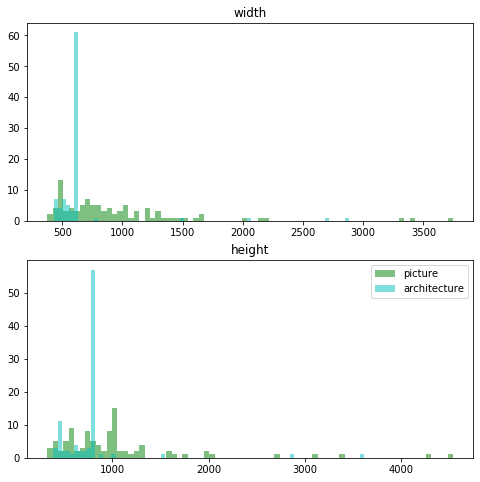

In [203]:
get_size = lambda x: pd.Series([x.img.shape[0],x.img.shape[1]])
art_or_building[['width', 'height']] = art_or_building.apply(get_size, axis=1)

bins = 75

for idx, col in enumerate(['width', 'height']):
    ax = plt.subplot(2,1,idx+1)
    ax.title.set_text(col)
    plt.hist(art_or_building[art_or_building['art_class']=='picture'][col], 
             bins, histtype='bar', alpha = 0.5, color= 'g', label='picture')
    plt.hist(art_or_building[art_or_building['art_class']=='architecture'][col], 
             bins, histtype='bar', alpha = 0.5, color= 'c', label='architecture')

plt.legend()    
plt.show()